In [327]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor


In [328]:
df = pd.read_csv("https://raw.githubusercontent.com/PratikBorkar04/consignment_pricing/main/notebook/dataset/final_dataset.csv")

In [329]:
df = df.drop(['Unnamed: 0'], axis=1)

In [330]:
df.head(1)

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,4521,India,3157


In [331]:
# To improve accuracy of Model
df["freight_cost"] = df["freight_cost"] - 1000

In [350]:
accuracy_data = {'Operation':["Original",'Subtract', 'Subtract', 'Add', 'Add'],
                 'Value' :[0,500,1000,500,1000],
        'Accuracy %':[64, 65, 66, 63,62]}
accuracy_data = pd.DataFrame(accuracy_data)
accuracy_data

,Operation,Value,Accuracy %
0,Original,0,64
1,Subtract,500,65
2,Subtract,1000,66
3,Add,500,63
4,Add,1000,62


In [332]:
df.head()

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,freight_cost,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,5521,India,3157
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360,3,0.07,1855,17007,India,3157
2,Vietnam,Direct Drop,EXW,Air,60,38000,121600,3,0.05,7590,46450,India,3157
3,Nigeria,Direct Drop,EXW,Air,240,416,2225,5,0.02,504,6920,India,7633
4,Tanzania,Direct Drop,EXW,Air,60,16667,60834,3,0.06,1478,7212,India,5659


In [333]:
#Preapare X and y variables
X = df.drop(columns=['freight_cost'],axis=1)

In [334]:
X.head()

,country,fulfill_via,vendor,shipment_mode,unit_of_measure,line_item_quantity,line_item_value,pack_price,unit_price,weight,location,distance
0,Vietnam,Direct Drop,EXW,Air,240,1000,6200,6,0.03,358,India,3157
1,Vietnam,Direct Drop,EXW,Air,60,31920,127360,3,0.07,1855,India,3157
2,Vietnam,Direct Drop,EXW,Air,60,38000,121600,3,0.05,7590,India,3157
3,Nigeria,Direct Drop,EXW,Air,240,416,2225,5,0.02,504,India,7633
4,Tanzania,Direct Drop,EXW,Air,60,16667,60834,3,0.06,1478,India,5659


In [335]:
y = df['freight_cost']


In [336]:
y

0        5521
1       17007
2       46450
3        6920
4        7212
        ...  
6497    11181
6498    11181
6499    11181
6500    11181
6501    11181
Name: freight_cost, Length: 6502, dtype: int64

In [337]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [338]:
X = preprocessor.fit_transform(X)
X.shape

(6502, 48)

In [339]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((5201, 48), (1301, 48))

In [340]:
#Create an Evaluate Function to give all metrics after model Training
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [341]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')


Linear Regression
Model performance for Training set
- Root Mean Squared Error: 8604.5300
- Mean Absolute Error: 4282.8879
- R2 Score: 0.3415
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11104.0745
- Mean Absolute Error: 4797.4313
- R2 Score: 0.1383


Lasso
Model performance for Training set
- Root Mean Squared Error: 8605.9793
- Mean Absolute Error: 4286.2697
- R2 Score: 0.3413
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11102.2032
- Mean Absolute Error: 4792.5296
- R2 Score: 0.1385


Ridge
Model performance for Training set
- Root Mean Squared Error: 8605.1600
- Mean Absolute Error: 4285.6191
- R2 Score: 0.3414
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 11101.4980
- Mean Absolute Error: 4795.4254
- R2 Score: 0.1387


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 6530.0279
- Mean Absolute Error: 2745.48

In [342]:
#Results
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


,Model Name,R2_Score
7,CatBoosting Regressor,0.638665
6,XGBRegressor,0.630598
5,Random Forest Regressor,0.606475
4,Decision Tree,0.464084
3,K-Neighbors Regressor,0.413402
8,AdaBoost Regressor,0.224470
2,Ridge,0.138652
1,Lasso,0.138543
0,Linear Regression,0.138252


In [343]:
#XGBRegressor
XGBRegressor_model = XGBRegressor()
XGBRegressor_model = XGBRegressor_model.fit(X_train, y_train)
y_pred = XGBRegressor_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 63.06


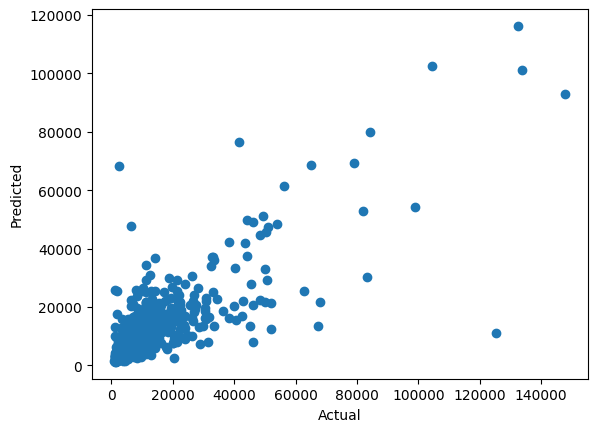

In [344]:
#Plot y_pred and y_test
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

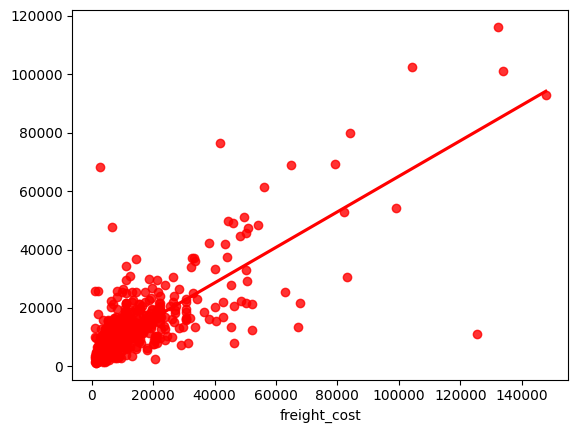

In [345]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');


In [346]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
3107,2332,5023.183594,-2691.183594
4885,5370,11199.260742,-5829.260742
1867,6265,9765.190430,-3500.190430
3269,1971,1976.367676,-5.367676
5510,11181,12620.438477,-1439.438477
...,...,...,...
1608,33104,25172.886719,7931.113281
2191,6460,9942.958008,-3482.958008
624,14353,6754.604980,7598.395020
69,11181,11287.347656,-106.347656
